In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ignore all FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [86]:
# con pandas, leer une xlsx
excel_file = pd.ExcelFile('Mental health Depression disorder Data (1).xlsx')

# Sheet prevalence-by-mental-and-substa
dfs = {}  # Diccionario para almacenar los DataFrames
for sheet_name in excel_file.sheet_names:
    dfs[sheet_name] = excel_file.parse(sheet_name)

# Sheet prevalence-by-mental-and-substa
prevelance_mental_substa = dfs['prevalence-by-mental-and-substa']

# Sheet depression-by-level-of-educatio
depression_education = dfs['depression-by-level-of-educatio']

# Sheet prevalence-of-depression-by-age
prevelance_depression_age = dfs['prevalence-of-depression-by-age']

# Sheet prevalence-of-depression-males-
prevelance_depression_male = dfs['prevalence-of-depression-males-']

# Sheet suicide-rates-vs-prevalence-of-
suicide_rate_vs_prevelance = dfs['suicide-rates-vs-prevalence-of-']

# Sheet number-with-depression-by-count
number_depression_count = dfs['number-with-depression-by-count']

In [87]:
depression_education.head()

Entity Code  Year  All levels (active) (%)  \
0         Austria  AUT  2014                      6.5   
1         Belgium  BEL  2014                      5.0   
2  Czech Republic  CZE  2014                      3.0   
3         Denmark  DNK  2014                      6.7   
4         Estonia  EST  2014                      3.8   

   All levels (employed) (%)  All levels (total) (%)  \
0                        4.7                     7.7   
1                        4.1                     7.1   
2                        2.6                     4.0   
3                        5.7                     8.3   
4                        3.8                     5.1   

   Below upper secondary (active) (%)  Below upper secondary (employed) (%)  \
0                                15.5                                   9.0   
1                                 7.1                                   4.8   
2                                 2.1                                   2.5   
3                                10.4                                   6.5   
4                                 4.7                                   4.7   

   Below upper secondary (total) (%)  Tertiary (active) (%)  \
0                               15.2                    4.3   
1                               11.6                    3.7   
2                                6.0                    1.7   
3                               15.5                    5.7   
4                                6.4                    3.6   

   Tertiary (employed) (%)  Tertiary (total) (%)  \
0                      3.5                   5.5   
1                      3.3                   4.2   
2                      1.7                   2.0   
3                      4.7                   6.7   
4                      3.6                   4.3   

   Upper secondary & post-secondary non-tertiary (active) (%)  \
0                                                5.5            
1                                                5.7            
2                                                3.5            
3                                                7.4            
4                                                3.7            

   Upper secondary & post-secondary non-tertiary (employed) (%)  \
0                                                4.2              
1                                                5.0              
2                                                3.0              
3                                                6.9              
4                                                3.8              

   Upper secondary & post-secondary non-tertiary (total) (%)  
0                                                6.7          
1                                                7.5          
2                                                4.4          
3                                                8.8          
4                                                5.2

In [88]:
depression_education.isnull().sum()

Entity                                                          0
Code                                                            1
Year                                                            0
All levels (active) (%)                                         0
All levels (employed) (%)                                       0
All levels (total) (%)                                          0
Below upper secondary (active) (%)                              0
Below upper secondary (employed) (%)                            0
Below upper secondary (total) (%)                               0
Tertiary (active) (%)                                           0
Tertiary (employed) (%)                                         0
Tertiary (total) (%)                                            0
Upper secondary & post-secondary non-tertiary (active) (%)      0
Upper secondary & post-secondary non-tertiary (employed) (%)    0
Upper secondary & post-secondary non-tertiary (total) (%)       0
dtype: int

In [89]:
depression_education.dropna()

Entity Code  Year  All levels (active) (%)  \
0          Austria  AUT  2014                      6.5   
1          Belgium  BEL  2014                      5.0   
2   Czech Republic  CZE  2014                      3.0   
3          Denmark  DNK  2014                      6.7   
4          Estonia  EST  2014                      3.8   
5          Finland  FIN  2014                      8.5   
6           France  FRA  2014                      5.2   
7          Germany  DEU  2014                     10.3   
8           Greece  GRC  2014                      2.8   
9          Hungary  HUN  2014                      2.8   
10         Iceland  ISL  2014                     10.7   
11         Ireland  IRL  2014                     11.2   
12           Italy  ITA  2014                      2.9   
13          Latvia  LVA  2014                      7.0   
14       Lithuania  LTU  2014                      2.1   
15      Luxembourg  LUX  2014                      9.1   
16     Netherlands  NLD  2014                      5.7   
17          Norway  NOR  2014                      4.8   
18          Poland  POL  2014                      2.9   
19        Portugal  PRT  2014                      9.5   
21        Slovenia  SVN  2014                      7.6   
22           Spain  ESP  2014                      5.5   
23          Sweden  SWE  2014                      8.4   
24          Turkey  TUR  2014                     10.2   
25  United Kingdom  GBR  2014                      7.4   

    All levels (employed) (%)  All levels (total) (%)  \
0                         4.7                     7.7   
1                         4.1                     7.1   
2                         2.6                     4.0   
3                         5.7                     8.3   
4                         3.8                     5.1   
5                         7.2                    10.7   
6                         4.7                     6.3   
7                         9.6                    11.6   
8                         2.2                     3.6   
9                         2.2                     4.7   
10                       10.5                    14.4   
11                        9.4                    12.3   
12                        2.2                     3.9   
13                        6.2                     8.6   
14                        1.7                     3.7   
15                        8.2                    10.2   
16                        4.9                     8.6   
17                        4.4                     7.6   
18                        2.5                     4.1   
19                        8.0                    11.0   
21                        6.0                     8.4   
22                        4.1                     7.1   
23                        8.0                     9.9   
24                        9.6                    12.5   
25                        6.3                     9.9   

    Below upper secondary (active) (%)  Below upper secondary (employed) (%)  \
0                                 15.5                                   9.0   
1                                  7.1                                   4.8   
2                                  2.1                                   2.5   
3                                 10.4                                   6.5   
4                                  4.7                                   4.7   
5                                  7.4                                   3.1   
6                                  7.7                                   7.1   
7                                 14.4                                  12.4   
8                                  4.2                                   2.9   
9                                  6.5                                   6.2   
10                                14.2                                  13.5   
11                                21.3                      

In [90]:
depression_education.dtypes

Entity                                                           object
Code                                                             object
Year                                                              int64
All levels (active) (%)                                         float64
All levels (employed) (%)                                       float64
All levels (total) (%)                                          float64
Below upper secondary (active) (%)                              float64
Below upper secondary (employed) (%)                            float64
Below upper secondary (total) (%)                               float64
Tertiary (active) (%)                                           float64
Tertiary (employed) (%)                                         float64
Tertiary (total) (%)                                            float64
Upper secondary & post-secondary non-tertiary (active) (%)      float64
Upper secondary & post-secondary non-tertiary (employed) (%)    

In [7]:
from ydata_profiling import ProfileReport
profile_2 = ProfileReport(depression_education, title='depression-by-level-of-educatio', explorative=True)
profile_2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Análisis de datos de depresión por nivel de educación
| Nombre de la variable                                      | Tipo de dato | Tipo de variable           |
|------------------------------------------------------------|--------------|----------------------------|
| Entity                                                     | object       | Cualitativa discreta       |
| Code                                                       | object       | Cualitativa discreta       |
| Year                                                       | int64        | Cuantitativa discreta      |
| All levels (active) (%)                                    | float64      | Cuantitativa continua      |
| All levels (employed) (%)                                  | float64      | Cuantitativa continua      |
| All levels (total) (%)                                     | float64      | Cuantitativa continua      |
| Below upper secondary (active) (%)                         | float64      | Cuantitativa continua      |
| Below upper secondary (employed) (%)                       | float64      | Cuantitativa continua      |
| Below upper secondary (total) (%)                          | float64      | Cuantitativa continua      |
| Tertiary (active) (%)                                      | float64      | Cuantitativa continua      |
| Tertiary (employed) (%)                                    | float64      | Cuantitativa continua      |
| Tertiary (total) (%)                                       | float64      | Cuantitativa continua      |
| Upper secondary & post-secondary non-tertiary (active) (%) | float64      | Cuantitativa continua      |
| Upper secondary & post-secondary non-tertiary (employed) (%) | float64    | Cuantitativa continua      |
| Upper secondary & post-secondary non-tertiary (total) (%)  | float64      | Cuantitativa continua      |


### Análisis de variables cuantitativas

In [91]:
import matplotlib.pyplot as plt

In [92]:
quantitative_columns = [ 'All levels (active) (%)', 'All levels (employed) (%)', 'All levels (total) (%)',
                        'Below upper secondary (active) (%)', 'Below upper secondary (employed) (%)', 'Below upper secondary (total) (%)',
                        'Tertiary (active) (%)', 'Tertiary (employed) (%)', 'Tertiary (total) (%)',
                        'Upper secondary & post-secondary non-tertiary (active) (%)',
                        'Upper secondary & post-secondary non-tertiary (employed) (%)',
                        'Upper secondary & post-secondary non-tertiary (total) (%)']

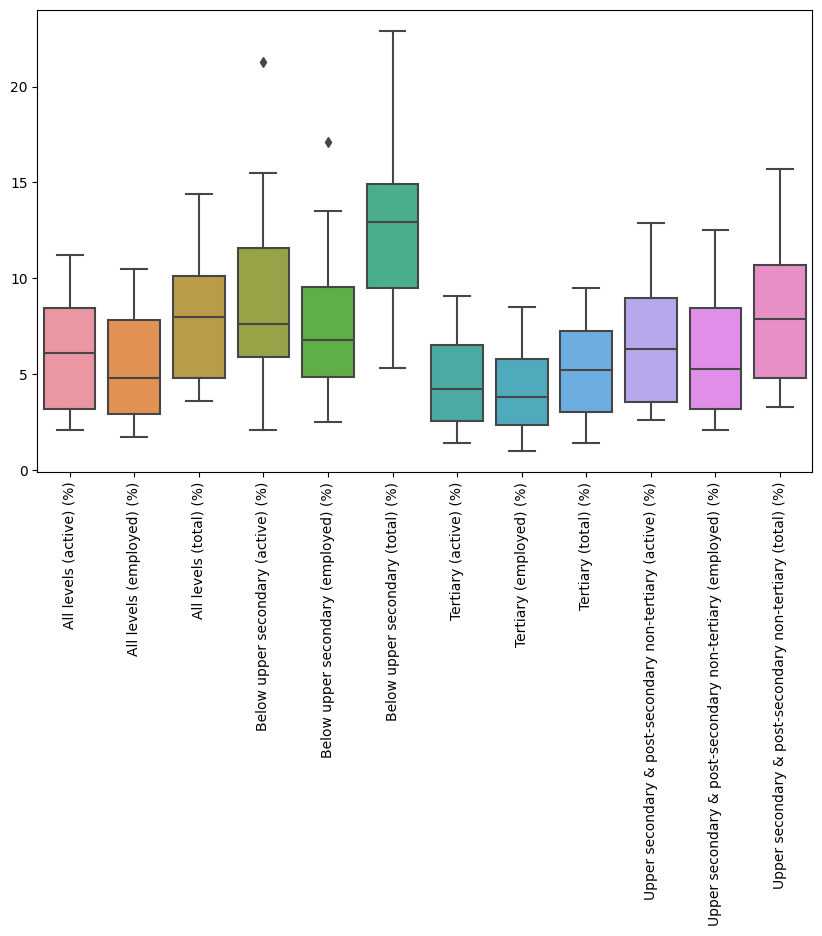

In [93]:
# generar caja de bigotes para todas las columnas cuantitativas
plt.figure(figsize=(10, 6))
sns.boxplot(data=depression_education[quantitative_columns])
plt.xticks(rotation=90)
plt.show()

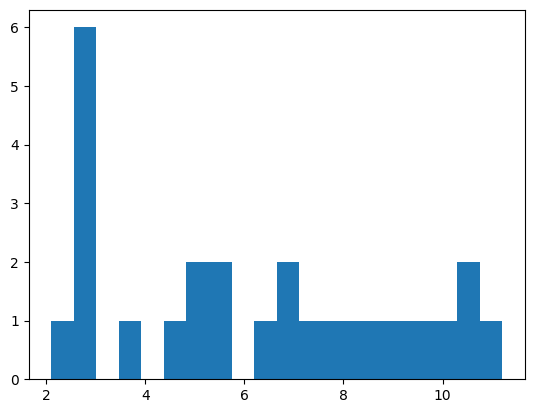

In [94]:
#All levels (active) (%)
plt.hist(depression_education['All levels (active) (%)'], bins=20)
plt.show()

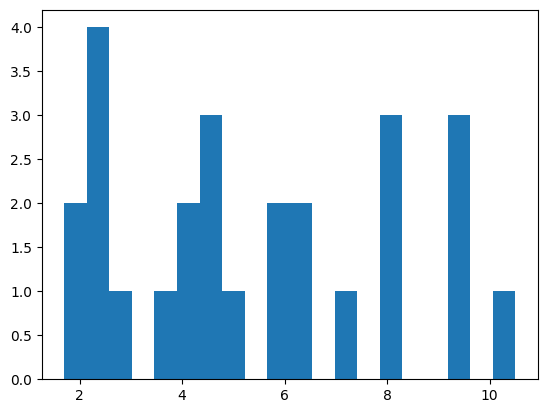

In [95]:
#All levels (employed) (%)
plt.hist(depression_education['All levels (employed) (%)'], bins=20)
plt.show()

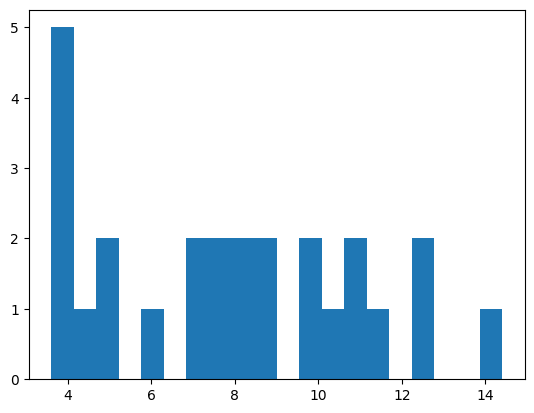

In [96]:
#All levels (total) (%)
plt.hist(depression_education['All levels (total) (%)'], bins=20)
plt.show()

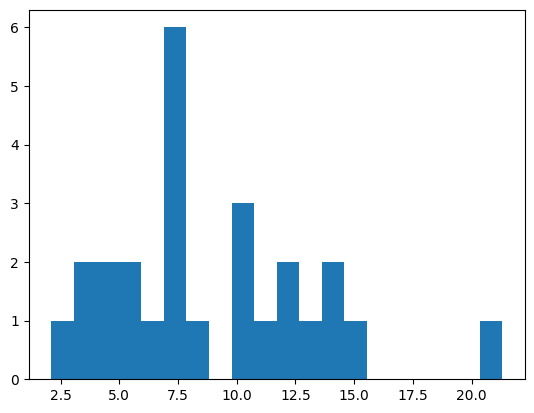

In [97]:
#Below upper secondary (active) (%)
plt.hist(depression_education['Below upper secondary (active) (%)'], bins=20)
plt.show()

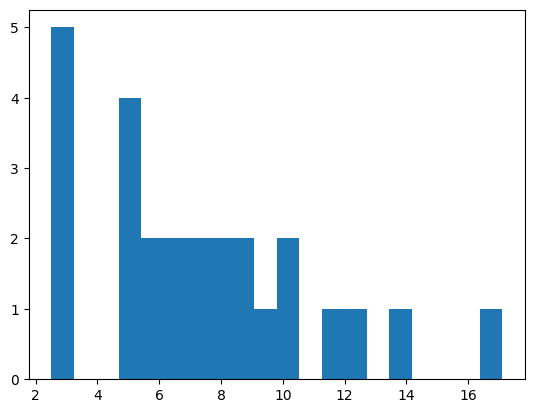

In [98]:
#Below upper secondary (employed) (%)
plt.hist(depression_education['Below upper secondary (employed) (%)'], bins=20)
plt.show()

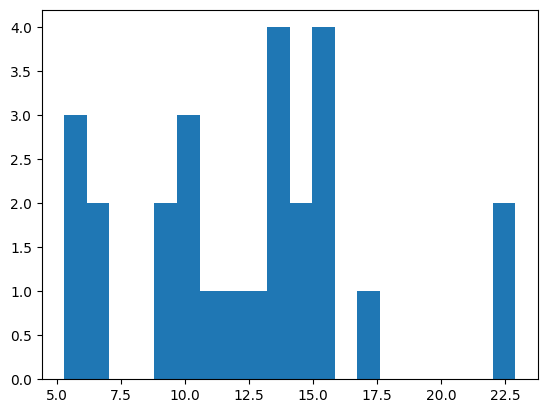

In [99]:
#Below upper secondary (total) (%)
plt.hist(depression_education['Below upper secondary (total) (%)'], bins=20)
plt.show()

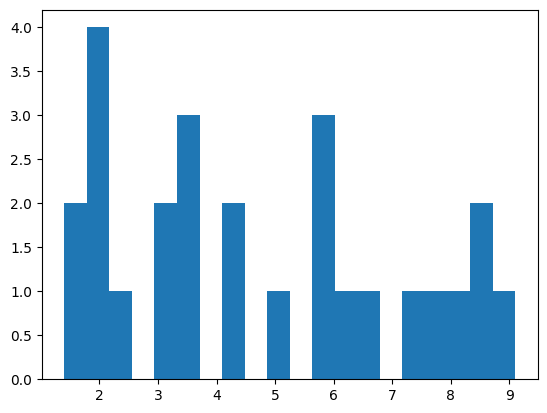

In [100]:
#Tertiary (active) (%)
plt.hist(depression_education['Tertiary (active) (%)'], bins=20)
plt.show()

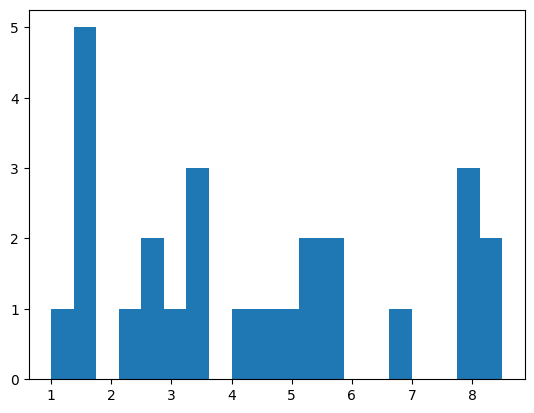

In [101]:
#Tertiary (employed) (%)
plt.hist(depression_education['Tertiary (employed) (%)'], bins=20)
plt.show()

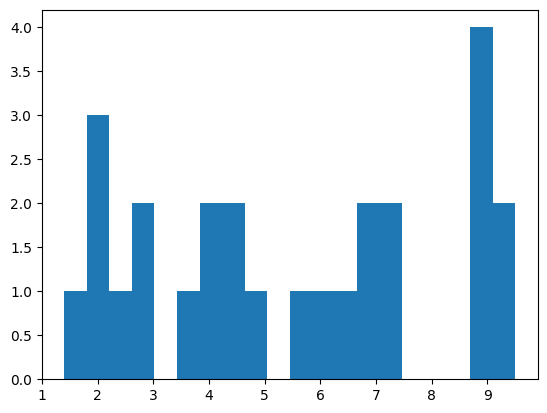

In [102]:
#Tertiary (total) (%)
plt.hist(depression_education['Tertiary (total) (%)'], bins=20)
plt.show()

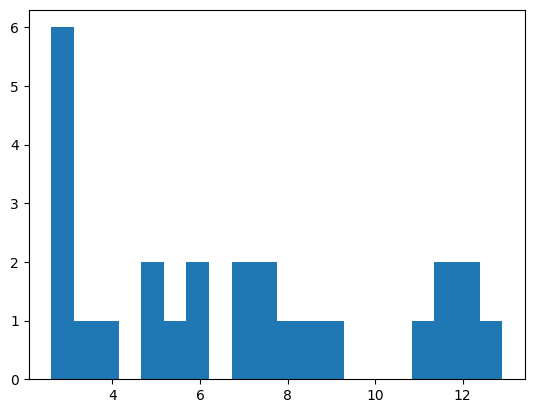

In [103]:
#Upper secondary & post-secondary non-tertiary (active) (%)
plt.hist(depression_education['Upper secondary & post-secondary non-tertiary (active) (%)'], bins=20)
plt.show()

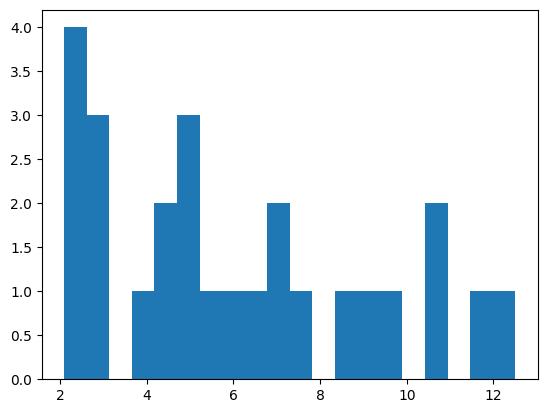

In [104]:
#Upper secondary & post-secondary non-tertiary (employed) (%)
plt.hist(depression_education['Upper secondary & post-secondary non-tertiary (employed) (%)'], bins=20)
plt.show()

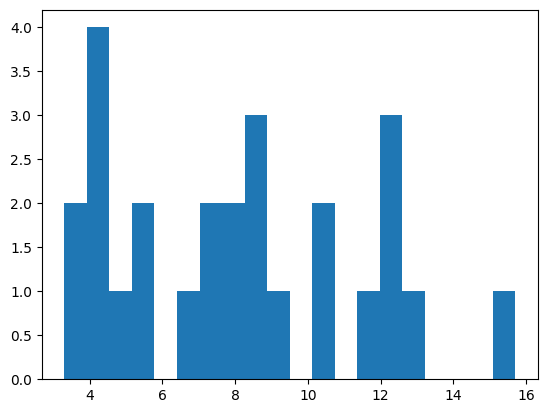

In [105]:
#Upper secondary & post-secondary non-tertiary (total) (%)
plt.hist(depression_education['Upper secondary & post-secondary non-tertiary (total) (%)'], bins=20)
plt.show()

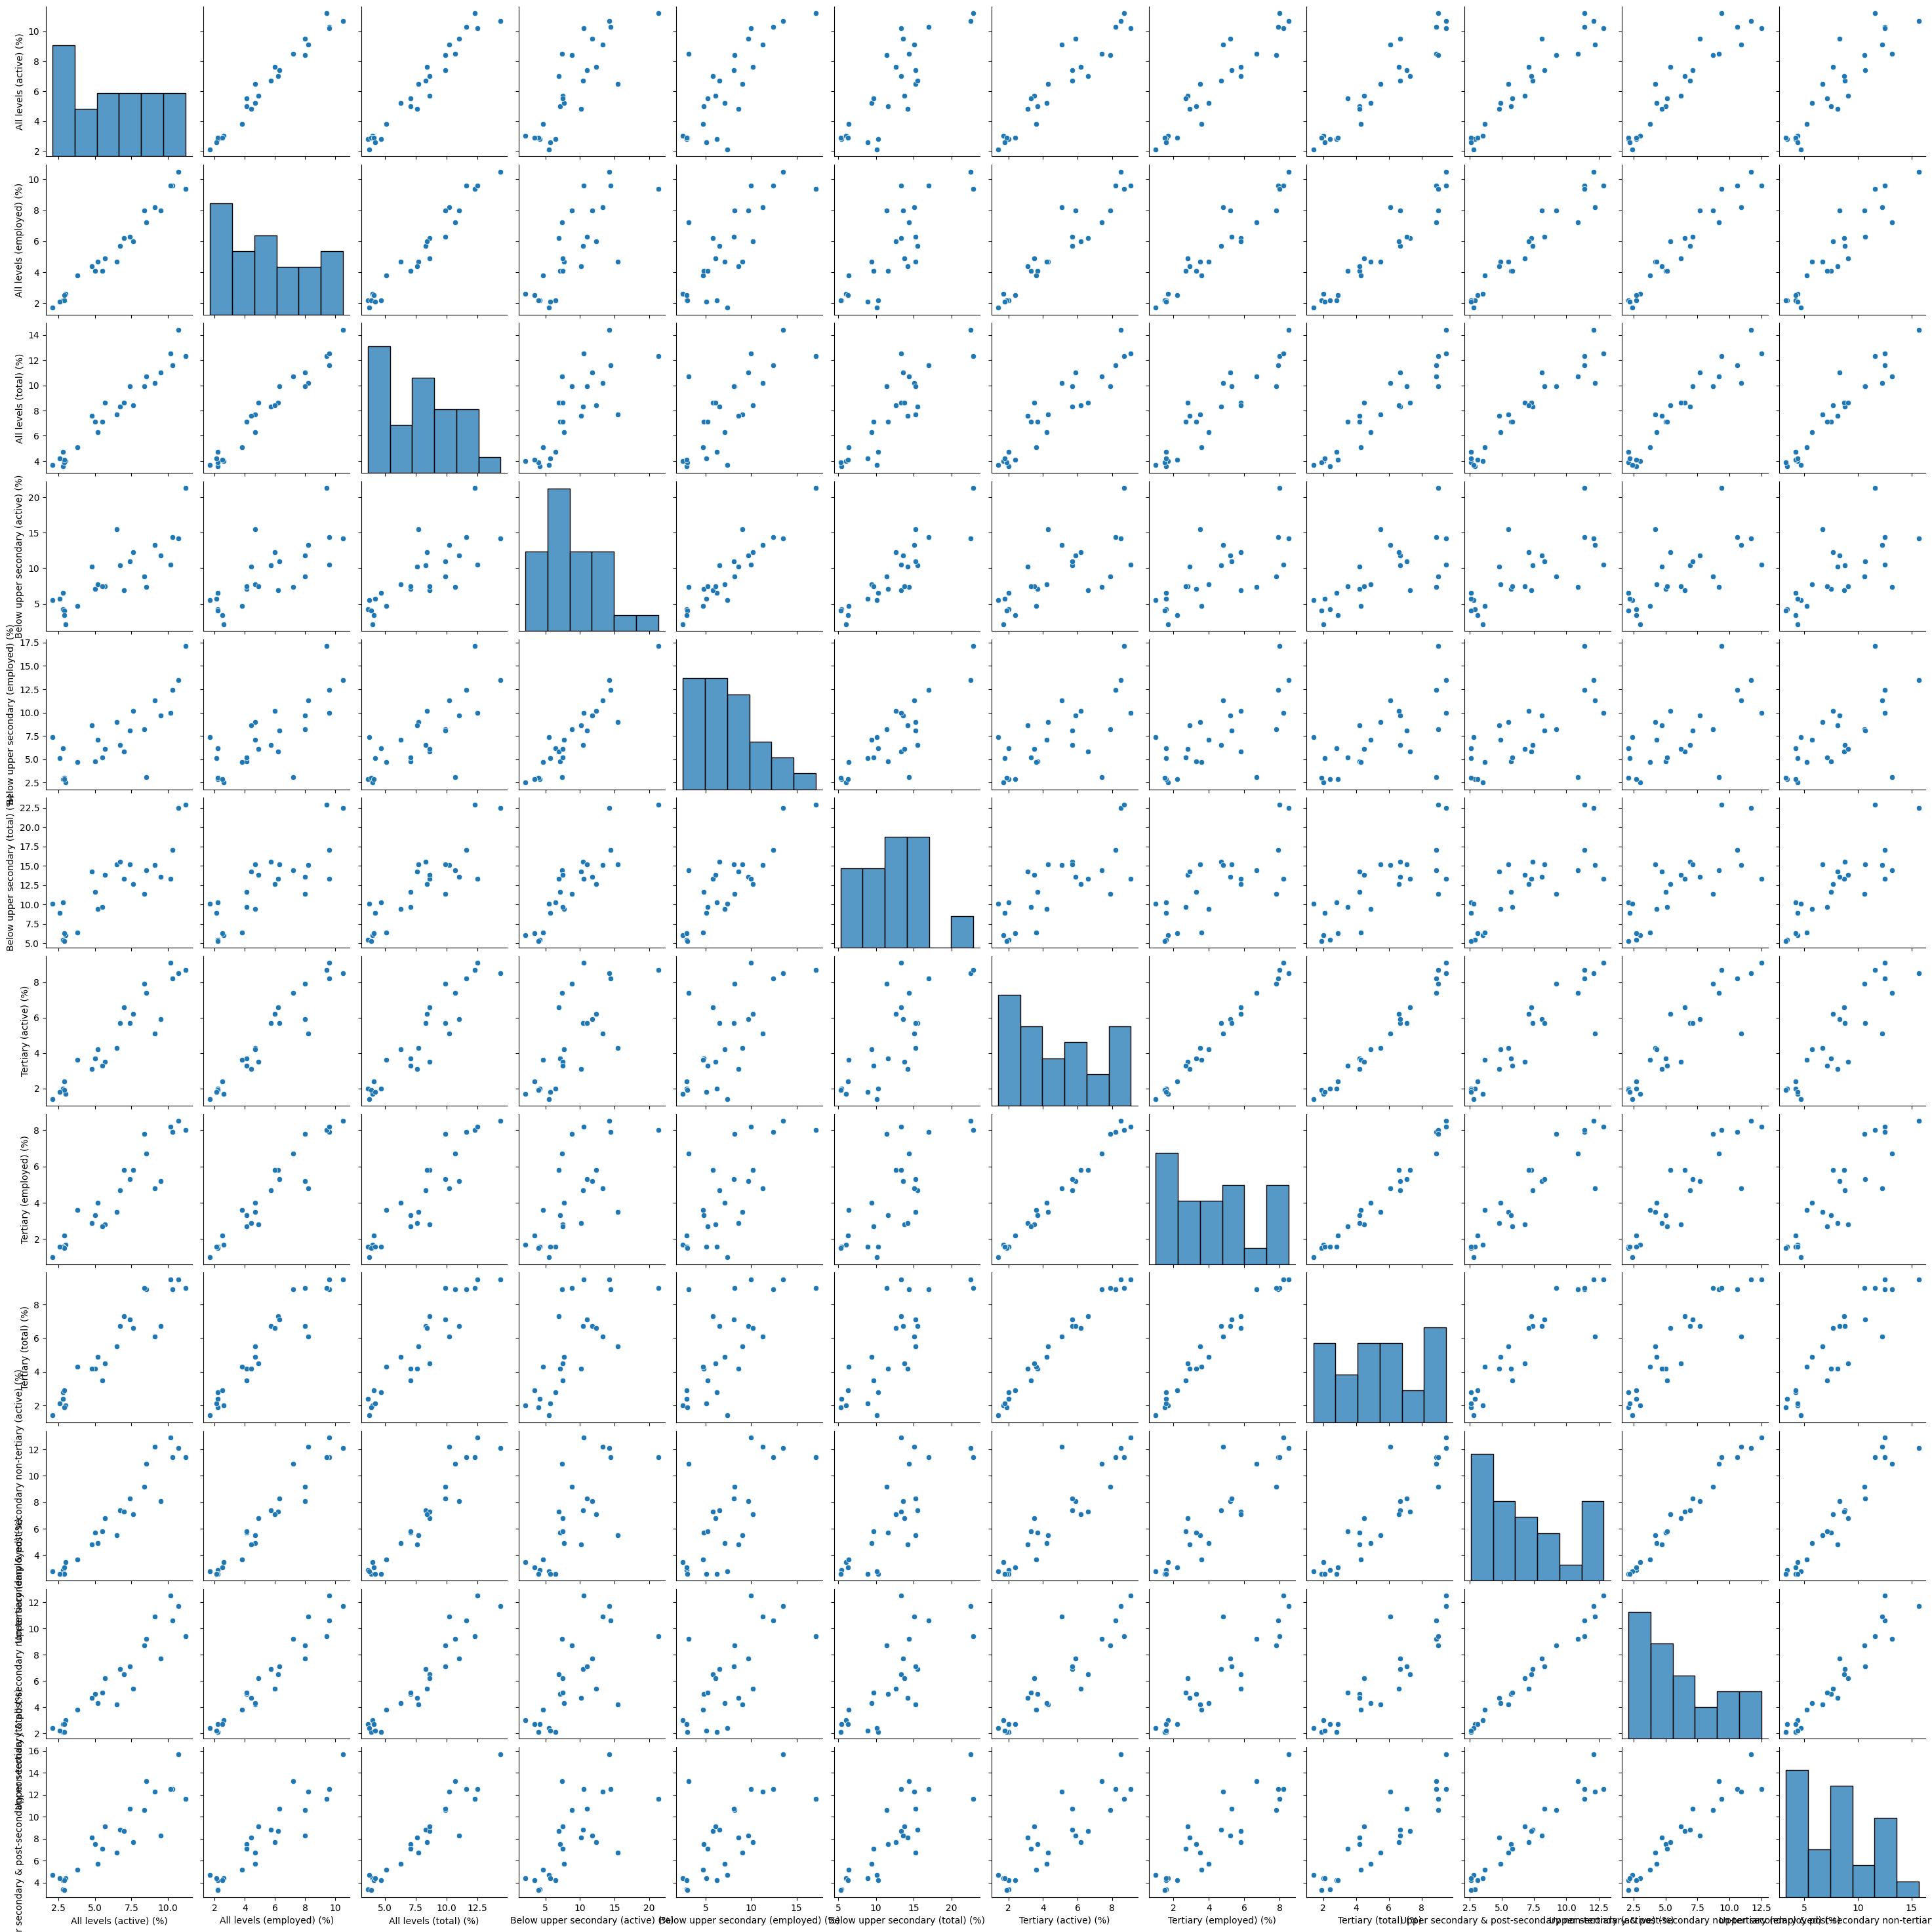

In [106]:

sns.pairplot(depression_education[quantitative_columns])

In [107]:
correlation_matrix = depression_education[quantitative_columns].corr()
correlation_matrix

All levels (active) (%)  \
All levels (active) (%)                                            1.000000   
All levels (employed) (%)                                          0.986540   
All levels (total) (%)                                             0.975526   
Below upper secondary (active) (%)                                 0.818891   
Below upper secondary (employed) (%)                               0.780870   
Below upper secondary (total) (%)                                  0.829386   
Tertiary (active) (%)                                              0.949220   
Tertiary (employed) (%)                                            0.939152   
Tertiary (total) (%)                                               0.945533   
Upper secondary & post-secondary non-tertiary (...                 0.960397   
Upper secondary & post-secondary non-tertiary (...                 0.943440   
Upper secondary & post-secondary non-tertiary (...                 0.913239   

                                                    All levels (employed) (%)  \
All levels (active) (%)                                              0.986540   
All levels (employed) (%)                                            1.000000   
All levels (total) (%)                                               0.975890   
Below upper secondary (active) (%)                                   0.765388   
Below upper secondary (employed) (%)                                 0.771044   
Below upper secondary (total) (%)                                    0.806786   
Tertiary (active) (%)                                                0.955469   
Tertiary (employed) (%)                                              0.957311   
Tertiary (total) (%)                                                 0.951850   
Upper secondary & post-secondary non-tertiary (...                   0.967122   
Upper secondary & post-secondary non-tertiary (...                   0.968124   
Upper secondary & post-secondary non-tertiary (...                   0.932975   

                                                    All levels (total) (%)  \
All levels (active) (%)                                           0.975526   
All levels (employed) (%)                                         0.975890   
All levels (total) (%)                                            1.000000   
Below upper secondary (active) (%)                                0.782021   
Below upper secondary (employed) (%)                              0.756875   
Below upper secondary (total) (%)                                 0.869286   
Tertiary (active) (%)                                             0.928934   
Tertiary (employed) (%)                                           0.920829   
Tertiary (total) (%)                                              0.937695   
Upper secondary & post-secondary non-tertiary (...                0.955004   
Upper secondary & post-secondary non-tertiary (...                0.950888   
Upper secondary & post-secondary non-tertiary (...                0.957455   

                                                    Below upper secondary (active) (%)  \
All levels (active) (%)                                                       0.818891   
All levels (employed) (%)                                                     0.765388   
All levels (total) (%)                                                        0.782021   
Below upper secondary (active) (%)                                            1.000000   
Below upper secondary (employed) (%)                                          0.926797   
Below upper secondary (total) (%)                                             0.891879   
Tertiary (active) (%)                                                         0.708615   
Tertiary (employed) (%)                                                       0.691865   
Tertiary (total) (%)                                                          0.707004   
Upper secondary & post-secondary non-tertiary (...     

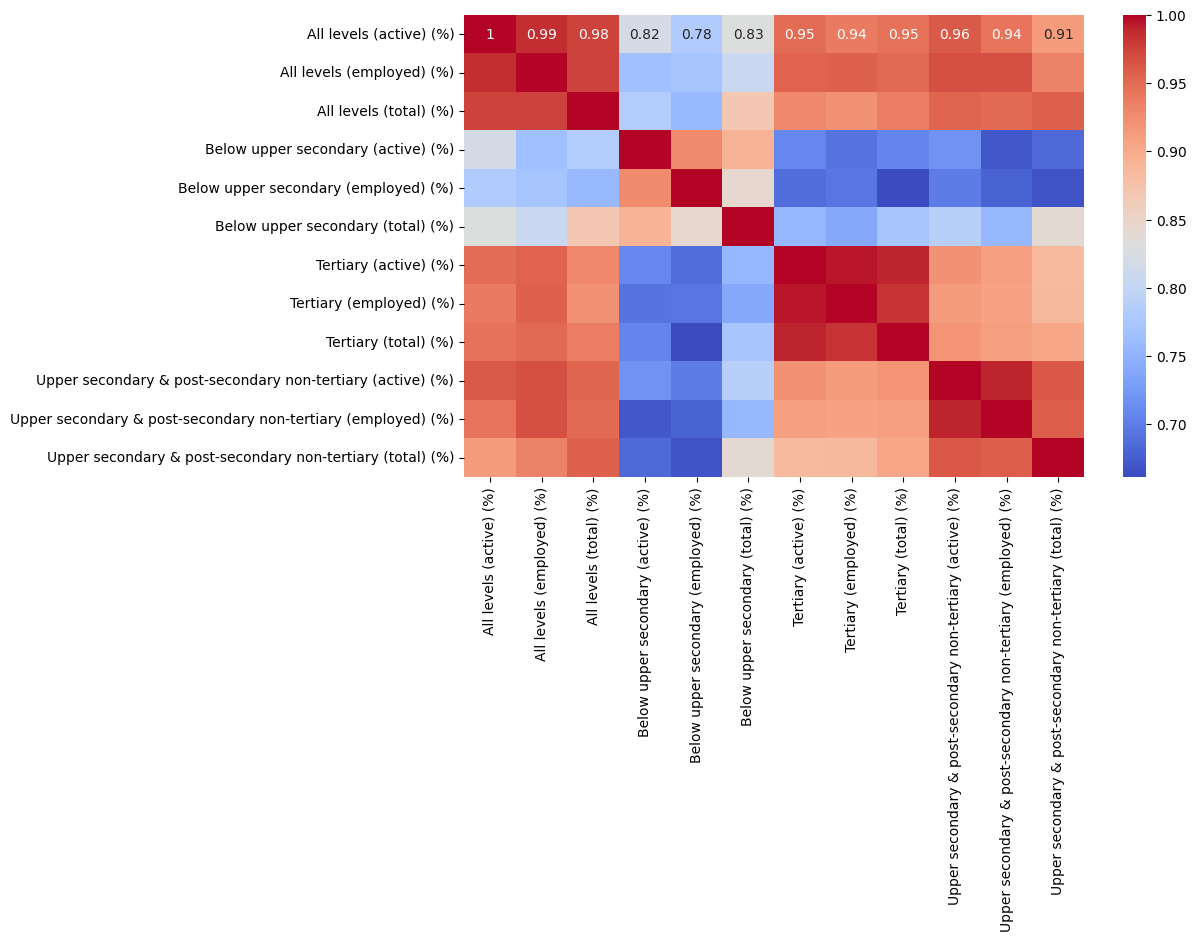

In [108]:

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Análisis de variables cualitativas (tablas de frecuencia)

In [110]:
#analisis variables cualitativas
qualitative_columns = ['Entity', 'Code', 'Year'] 

Entity
Austria            1
Belgium            1
Turkey             1
Sweden             1
Spain              1
Slovenia           1
Slovak Republic    1
Portugal           1
Poland             1
Norway             1
Netherlands        1
Luxembourg         1
Lithuania          1
Latvia             1
Italy              1
Ireland            1
Iceland            1
Hungary            1
Greece             1
Germany            1
France             1
Finland            1
Estonia            1
Denmark            1
Czech Republic     1
United Kingdom     1
Name: count, dtype: int64
Code
AUT    1
LVA    1
TUR    1
SWE    1
ESP    1
SVN    1
PRT    1
POL    1
NOR    1
NLD    1
LUX    1
LTU    1
ITA    1
BEL    1
IRL    1
ISL    1
HUN    1
GRC    1
DEU    1
FRA    1
FIN    1
EST    1
DNK    1
CZE    1
GBR    1
Name: count, dtype: int64
Year
2014    26
Name: count, dtype: int64


In [111]:
#analisis de la variable Entity
depression_education['Entity'].value_counts()

Entity
Austria            1
Belgium            1
Turkey             1
Sweden             1
Spain              1
Slovenia           1
Slovak Republic    1
Portugal           1
Poland             1
Norway             1
Netherlands        1
Luxembourg         1
Lithuania          1
Latvia             1
Italy              1
Ireland            1
Iceland            1
Hungary            1
Greece             1
Germany            1
France             1
Finland            1
Estonia            1
Denmark            1
Czech Republic     1
United Kingdom     1
Name: count, dtype: int64

In [112]:
#analisis de la variable Code
depression_education['Code'].value_counts()

Code
AUT    1
LVA    1
TUR    1
SWE    1
ESP    1
SVN    1
PRT    1
POL    1
NOR    1
NLD    1
LUX    1
LTU    1
ITA    1
BEL    1
IRL    1
ISL    1
HUN    1
GRC    1
DEU    1
FRA    1
FIN    1
EST    1
DNK    1
CZE    1
GBR    1
Name: count, dtype: int64

In [113]:
#analisis de la variable Year
depression_education['Year'].value_counts()

Year
2014    26
Name: count, dtype: int64

### Encoding

In [116]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

data_level_education = pd.get_dummies(depression_education, columns=qualitative_columns)
data_level_education


All levels (active) (%)  All levels (employed) (%)  \
0                       6.5                        4.7   
1                       5.0                        4.1   
2                       3.0                        2.6   
3                       6.7                        5.7   
4                       3.8                        3.8   
5                       8.5                        7.2   
6                       5.2                        4.7   
7                      10.3                        9.6   
8                       2.8                        2.2   
9                       2.8                        2.2   
10                     10.7                       10.5   
11                     11.2                        9.4   
12                      2.9                        2.2   
13                      7.0                        6.2   
14                      2.1                        1.7   
15                      9.1                        8.2   
16                      5.7                        4.9   
17                      4.8                        4.4   
18                      2.9                        2.5   
19                      9.5                        8.0   
20                      2.6                        2.1   
21                      7.6                        6.0   
22                      5.5                        4.1   
23                      8.4                        8.0   
24                     10.2                        9.6   
25                      7.4                        6.3   

    All levels (total) (%)  Below upper secondary (active) (%)  \
0                      7.7                                15.5   
1                      7.1                                 7.1   
2                      4.0                                 2.1   
3                      8.3                                10.4   
4                      5.1                                 4.7   
5                     10.7                                 7.4   
6                      6.3                                 7.7   
7                     11.6                                14.4   
8                      3.6                                 4.2   
9                      4.7                                 6.5   
10                    14.4                                14.2   
11                    12.3                                21.3   
12                     3.9                                 4.0   
13                     8.6                                 6.9   
14                     3.7                                 5.5   
15                    10.2                                13.3   
16                     8.6                                 7.5   
17                     7.6                                10.2   
18                     4.1                                 3.4   
19                    11.0                                11.8   
20                     4.2                                 5.7   
21                     8.4                                12.3   
22                     7.1                                 7.5   
23                     9.9                                 8.8   
24                    12.5                                10.5   
25                     9.9                                11.0   

    Below upper secondary (employed) (%)  Below upper secondary (total) (%)  \
0                                    9.0                               15.2   
1                                    4.8                               11.6   
2                                    2.5                                6.0   
3                                    6.5                               15.5   
4                                    4.7                                6.4   
5                                    3.1                               14.4   
6                                    7.1                                9.4   
7                     